In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_vals(path):
    episodic = pd.read_csv(path)
    train_scores = []
    test_scores = []
    returns = []
    qvalues = []
    for i in range(5):
        train_scores.append(episodic.loc[episodic['Run #']==i][f'Test Seed {0} Score'])
        test_scores.append(episodic.loc[episodic['Run #']==i][f'Test Seed {42} Score'])
        returns.append(episodic.loc[episodic['Run #']==i]['Returns'])
        qvalues.append(episodic.loc[episodic['Run #']==i]['Take Coin QValue'])
    return train_scores, test_scores, returns, qvalues

In [3]:
def get_vals_lvl10(path):
    episodic = pd.read_csv(path)
    train_scores = []
    test_scores = []
    returns = []
    qvalues = []
    for i in range(5):
        #scores.append(cumulative['Testing Loss 0'])
        #returns.append(cumulative['Returns'])
        train_scores.append(episodic.loc[episodic['Run #']==i][f'Test Seed {0} Score'])
        test_scores.append(episodic.loc[episodic['Run #']==i][f'Test Seed {42} Score'])
        returns.append(episodic.loc[episodic['Run #']==i]['Returns'])
        qvalues.append(episodic.loc[episodic['Run #']==i]['Take Coin QValue'])
    return train_scores, test_scores, returns, qvalues

In [5]:
files = [("./data/Level 10/per_10_long.csv", "per"),
          ("./data/Level 10/cumulative_10_long.csv", "cumulative"),
         ("./data/Level 10/episodic_10_long.csv", "episodic"),
         ("./data/Level 10/pser_10_long.csv", "pser")]

mean_train = []
mean_test = []
mean_rets = []
mean_qval = []
std_train = []
std_test = []
std_rets = []
std_qval = []
for file_path, label in files:
  train_scores, test_scores, returns, qvalues = get_vals(file_path)

  mean_train_scores = np.mean(train_scores, axis=0)
  mean_test_scores = np.mean(test_scores, axis=0)
  mean_returns_scores = np.mean(returns, axis=0)
  mean_qvals = np.mean(qvalues, axis=0)


  std_train_scores = np.std(train_scores, axis=0)
  std_test_scores = np.std(test_scores, axis=0)
  std_returns_scores = np.std(returns, axis=0)
  std_qvals = np.std(qvalues, axis=0)

  mean_train.append(mean_train_scores)
  mean_test.append(mean_test_scores)
  mean_rets.append(mean_returns_scores)
  mean_qval.append(mean_qvals)

  std_train.append(std_train_scores)
  std_test.append(std_test_scores)
  std_rets.append(std_returns_scores)
  std_qval.append(std_qvals)



In [6]:
def plot_qvals():
  epochs = list(range(0, len(mean_train[0])))

  for i in range(len(mean_qval)):
    plt.plot(epochs, mean_qval[i], label=files[i][1])
    plt.fill_between(epochs, mean_qval[i] - std_qval[i], mean_qval[i] + std_qval[i], alpha=0.2)


  plt.title('Average \'take coin\' QValues')
  plt.xlabel('Epoch')
  plt.ylabel('QValue')
  plt.legend()
  plt.show()

In [7]:
def plot_scores():
  epochs = list(range(0, len(mean_train[0])))

  for i in range(len(mean_train)):
    plt.plot(epochs, mean_train[i], label=files[i][1])
    plt.fill_between(epochs, mean_train[i] - std_train[i], mean_train[i] + std_train[i], alpha=0.2)


  plt.title('Average Scores on Seed 0 Game')
  plt.xlabel('Epoch')
  plt.ylabel('Score')
  plt.legend()
  plt.show()

In [8]:
def plot_test_scores():
  epochs = list(range(0, len(mean_test[0])))

  for i in range(len(mean_test)):
    plt.plot(epochs, mean_test[i], label=files[i][1])
    plt.fill_between(epochs, mean_test[i] - std_test[i], mean_test[i] + std_test[i], alpha=0.2)


  plt.title('Average Scores on Seed 42 Game')
  plt.xlabel('Epoch')
  plt.ylabel('Score')
  plt.legend()
  plt.show()

In [9]:
def plot_returns():
  epochs = list(range(0, len(mean_rets[0])))

  for i in range(len(mean_rets)):
    plt.plot(epochs, mean_rets[i], label=files[i][1])
    plt.fill_between(epochs, mean_rets[i] - std_rets[i], mean_rets[i] + std_rets[i], alpha=0.2)


  plt.title('Average Returns')
  plt.xlabel('Epoch')
  plt.ylabel('Returns')
  plt.legend()
  plt.show()

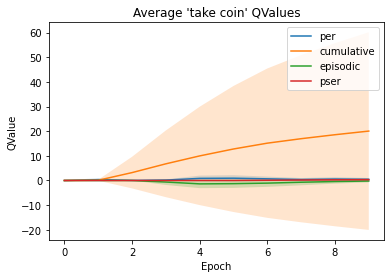

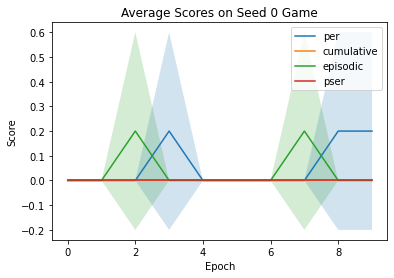

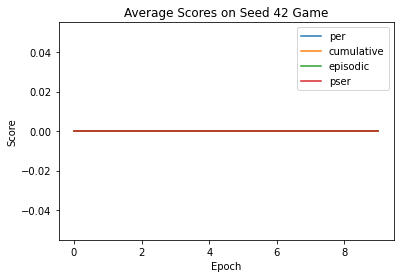

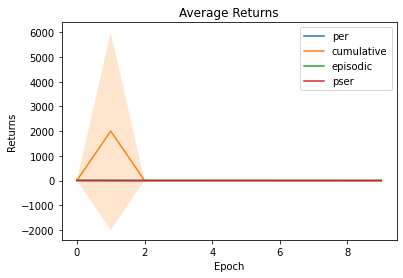

In [10]:
plot_qvals()
plot_scores()
plot_test_scores()
plot_returns()